##  Dataset Description  

The Red Wine Quality dataset consists of **1,599 samples** of Portuguese red wines.  
Each sample is described by **11 physicochemical properties** (such as acidity, sugar, chlorides, sulphates, alcohol, etc.) and is labeled with a **quality score** ranging from **0 to 10** (assigned by wine experts).  

- **Feature Type:** All input variables are numeric (float or int).  
- **Target Variable:** `quality` (ordinal integer values, mostly between 3 and 8).  
- **Goal:** Analyze which chemical properties are most influential in determining wine quality.  

This dataset is commonly used for **classification, regression, and exploratory data analysis (EDA)** tasks in machine learning.  


## 1. Data Import & Overview

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Data Preprocessing  

Data preprocessing prepares the dataset for analysis by checking its structure, data types, and overall summary.  
In this step, we used `.info(), .describe(), .shape` and `.coloumns` to understand the dataset’s format and statistical properties.  


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [127]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [128]:
df.shape

(1599, 12)

In [129]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## 3. Data Cleaning (Missing Values & Duplicates)  

Data cleaning ensures accuracy and reliability.  
We checked for **missing values** (none found) and identified **duplicate rows**, which were removed to avoid bias in results.  


In [130]:
#Missing Values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [131]:
##Finding Duplicates 
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [132]:
#Removing Duplicates and df is:
df.drop_duplicates(inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 4. Exploratory Data Analysis (EDA)  

Exploratory Data Analysis (EDA) is the process of **summarizing and visualizing data** to understand patterns, detect anomalies, and explore relationships between variables.  
It helps us identify **key features that influence wine quality** and guides the direction of feature engineering and modeling.  

In this section, we will explore:  
- Distribution of the target variable (wine quality)  
- Behavior of individual features  
- Relationship between features and wine quality  
- Correlations among features  
- Combined effects of multiple features  


### 4.1 Target Variable Analysis  

The target variable in this dataset is **wine quality** (scores from 3 to 8).  
Studying its distribution helps us understand whether the dataset is **balanced or imbalanced**.  
This step highlights which quality levels dominate the dataset.  


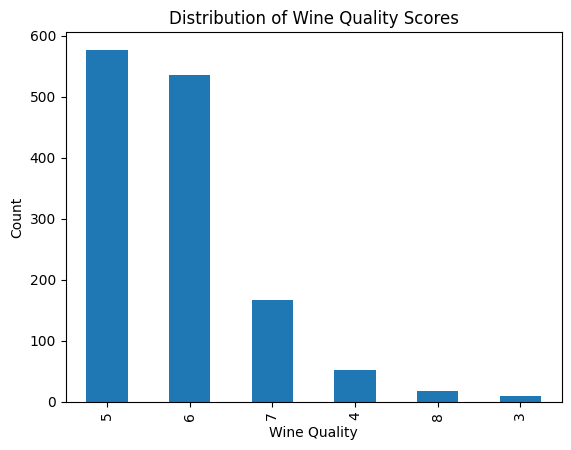

In [133]:
df.quality.value_counts().plot(kind="bar")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Scores")
plt.show()

## 4.2 Univariate Analysis  

Univariate analysis focuses on **one feature at a time**.  
It helps to understand distributions, detect skewness, and identify outliers for individual variables.  


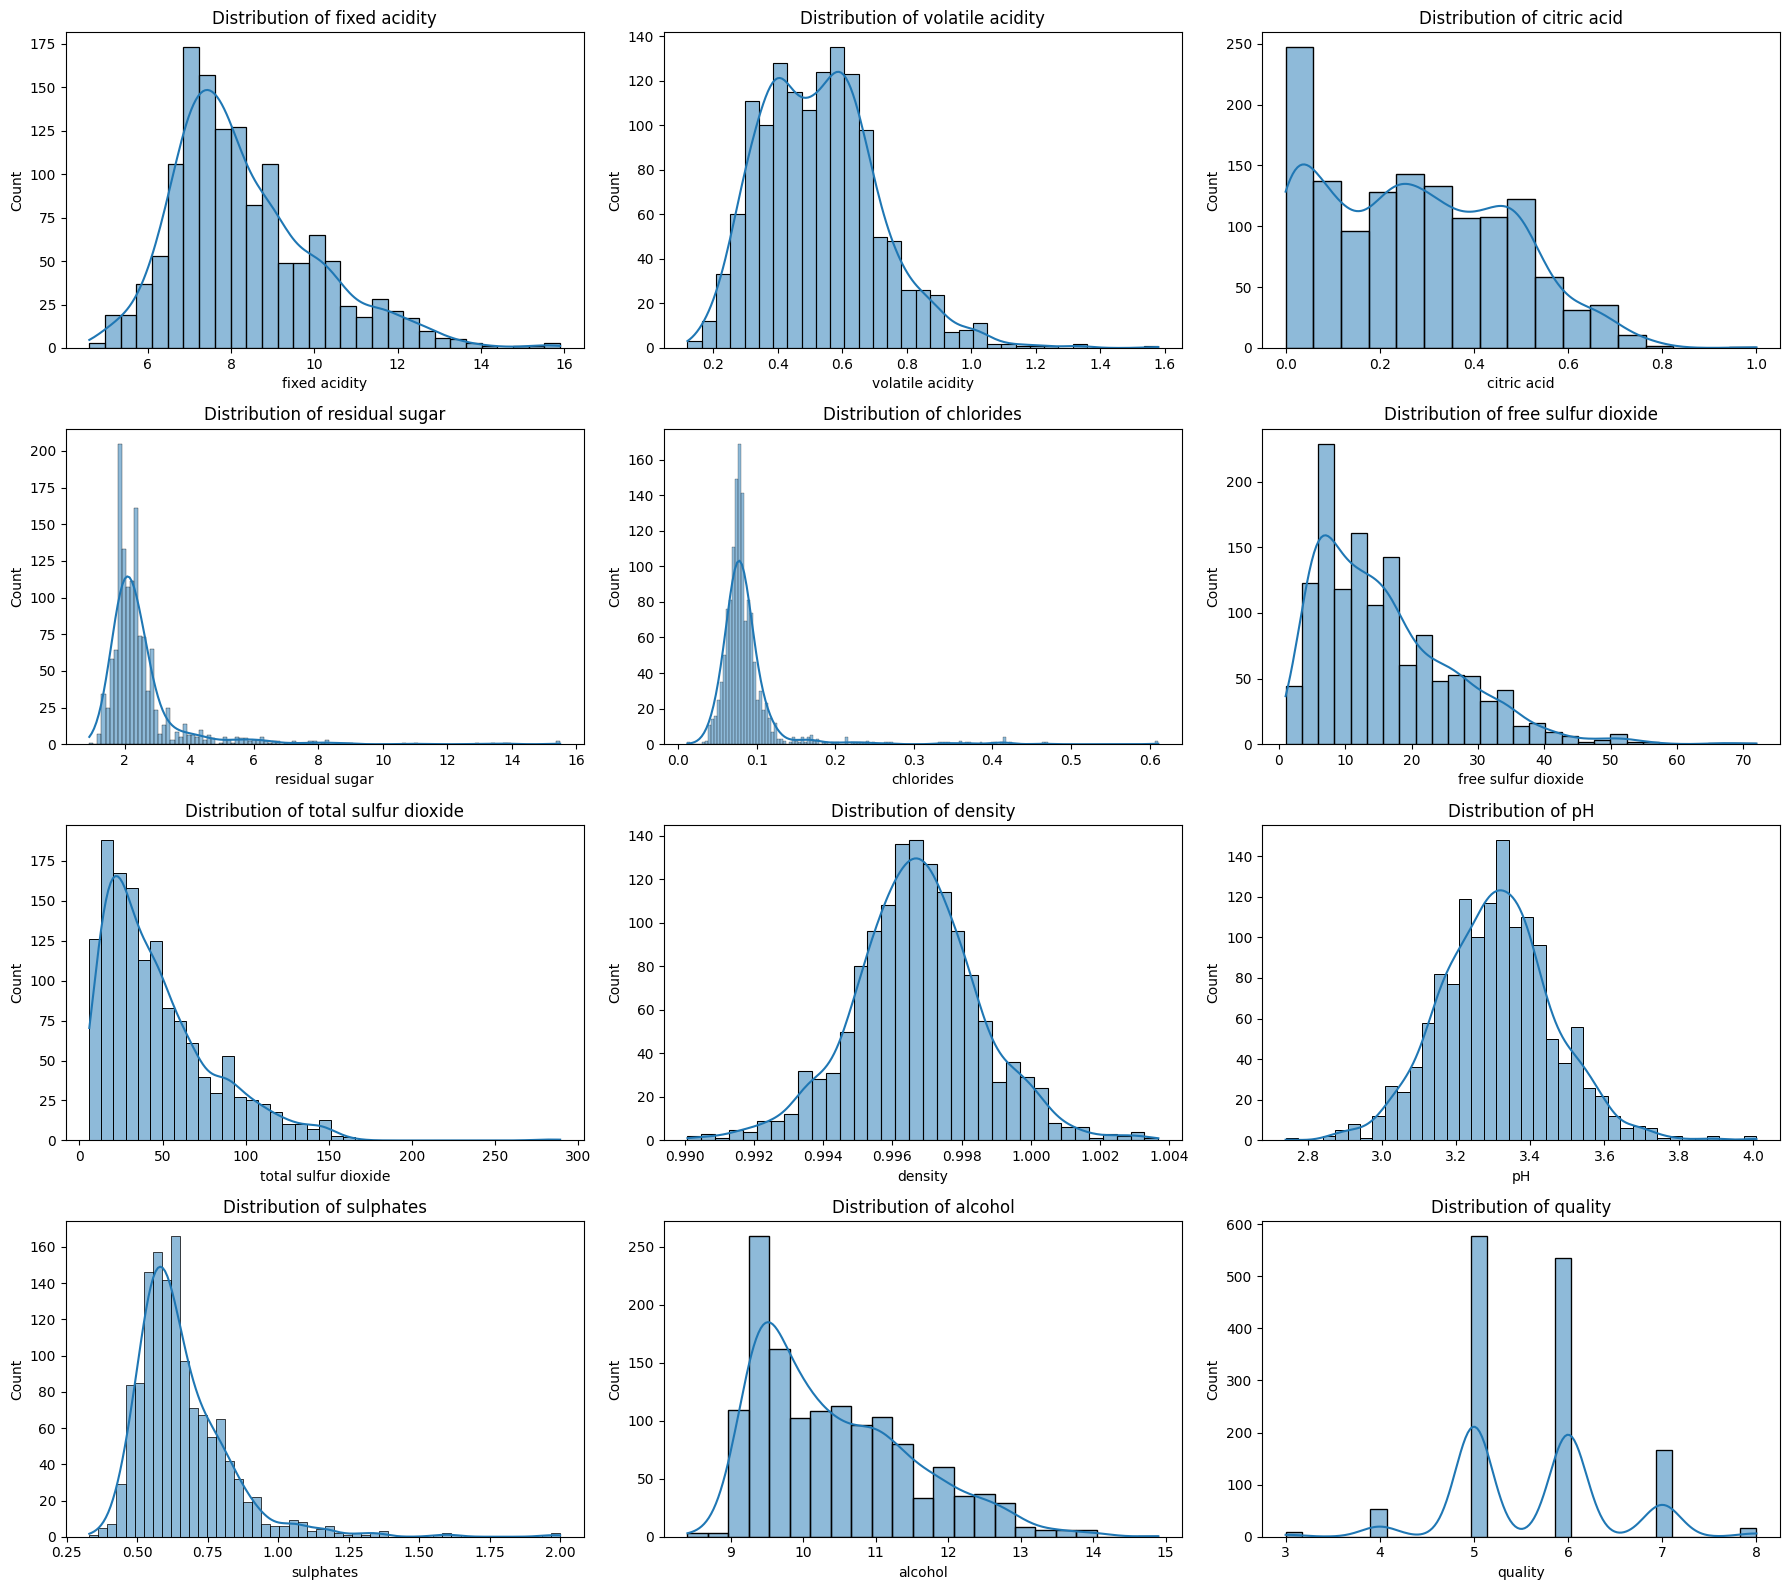

In [134]:
import math

num_col=len(df.columns)
num_rows=math.ceil(num_col/3)

fig,axes=plt.subplots(num_rows,3,figsize=(18,num_rows * 4))
axes=axes.flatten()

for i,column in enumerate(df.columns):
    sns.histplot(df[column],kde=True,ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


## 4.3 Bivariate Analysis  

Bivariate analysis explores the **relationship between one feature and the target variable** (wine quality).  
It highlights which chemical properties (like alcohol, acidity, sulphates) have a strong impact on wine quality.  


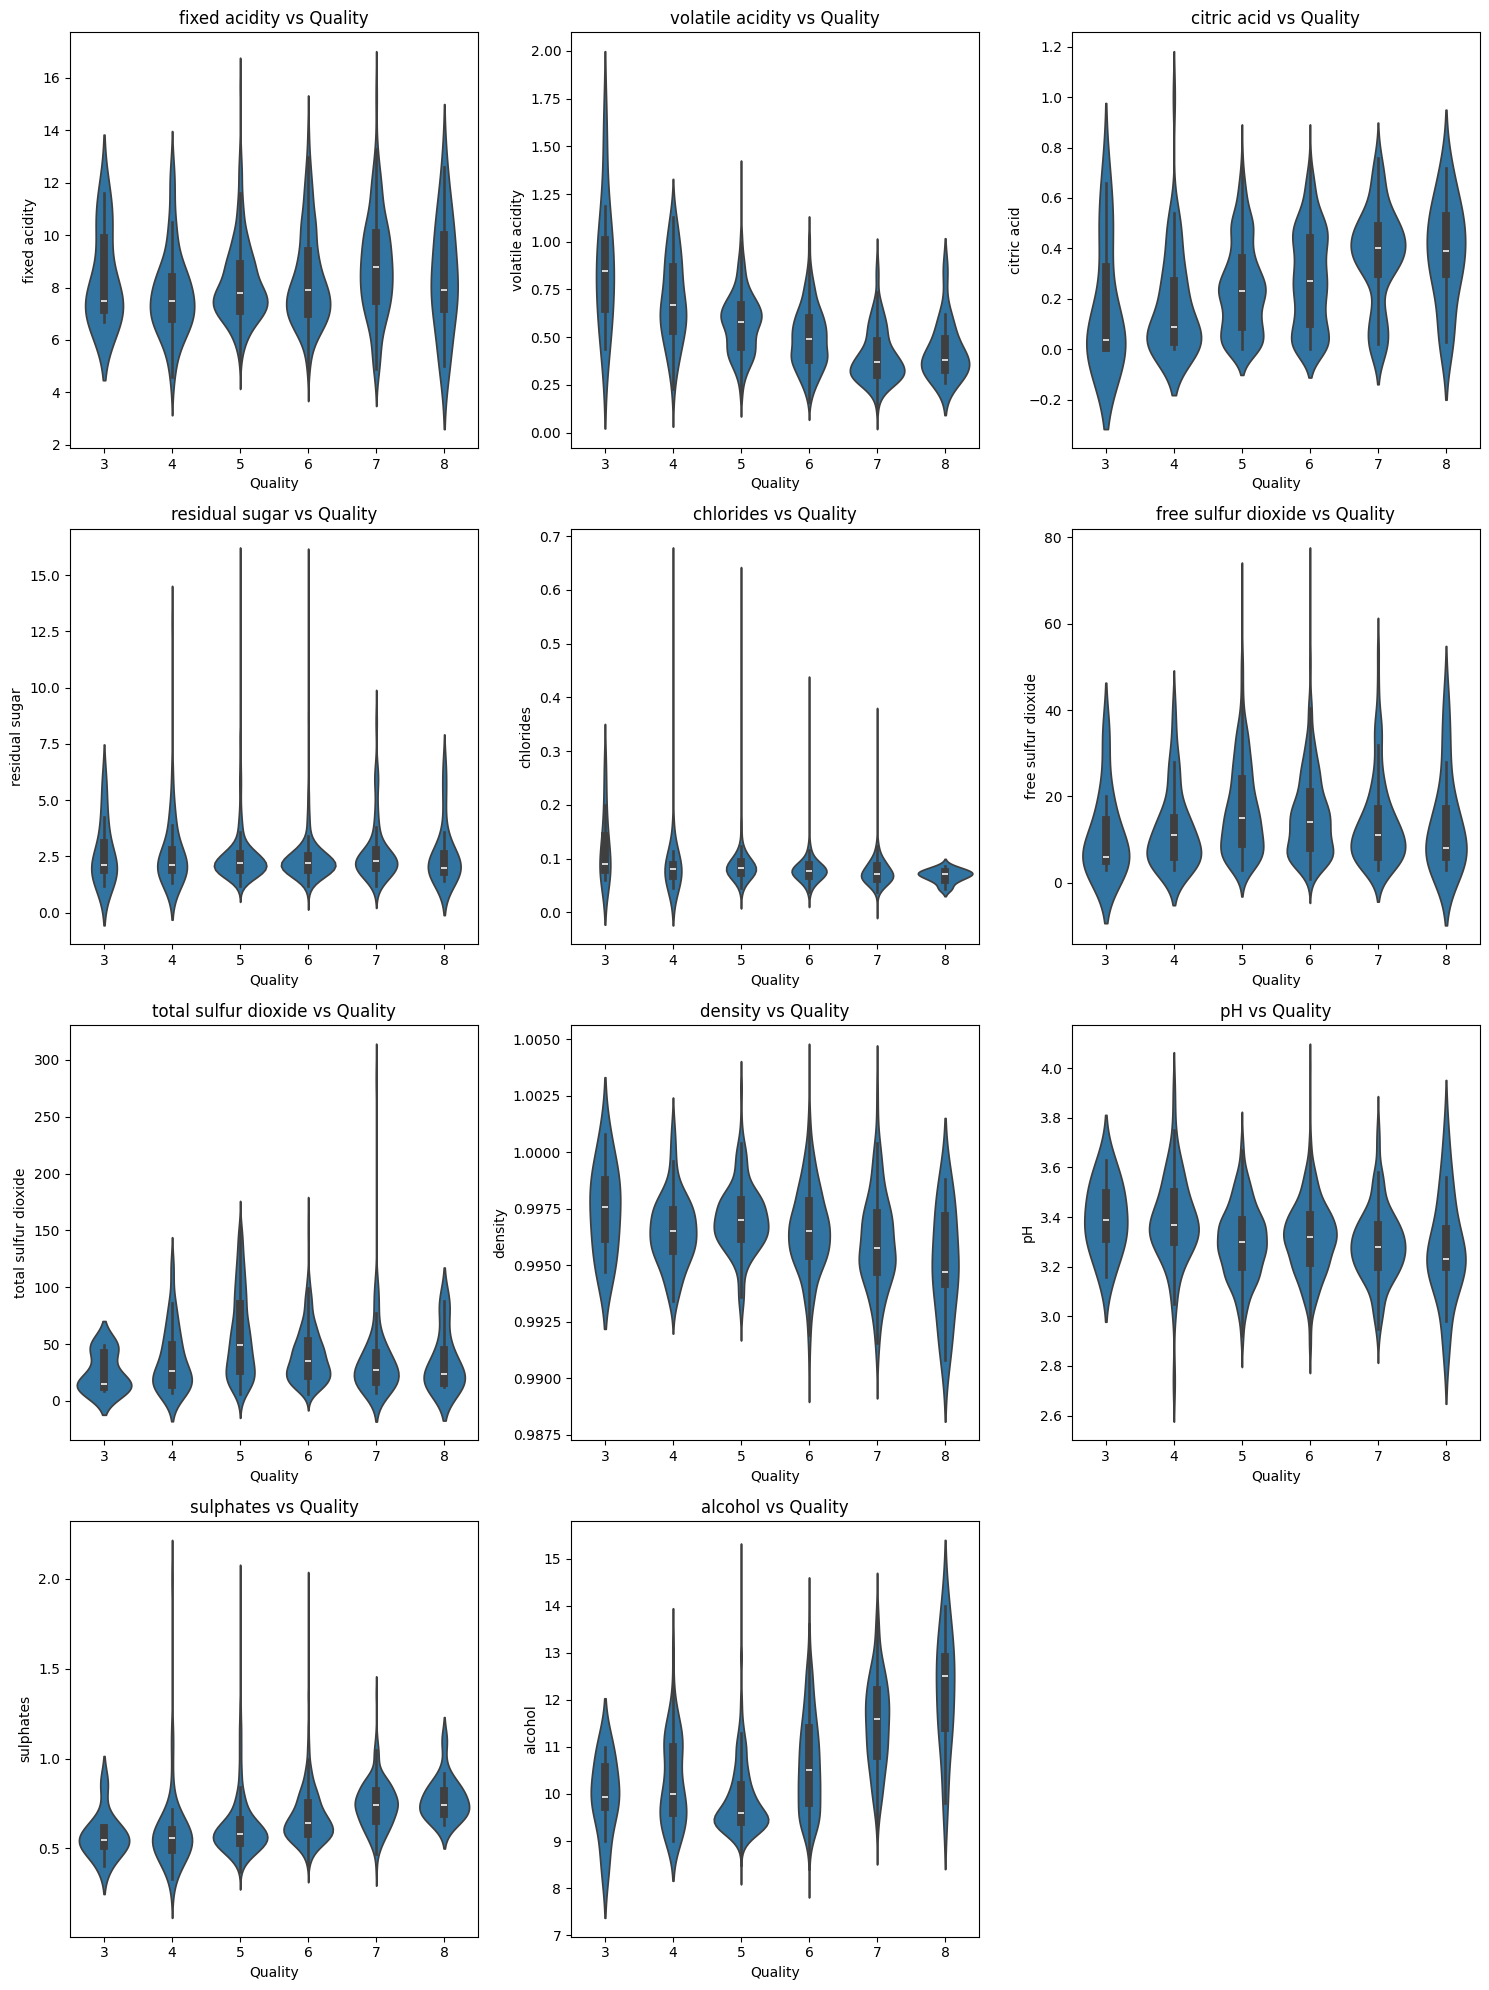

In [135]:
features=df.columns[:-1]
rows=(len(features)//3)+1
fig,axes=plt.subplots(rows,3,figsize=(15,5*rows))
axes=axes.flatten()
for i,column in enumerate(features):
    sns.violinplot(x='quality',y=column,data=df,ax=axes[i])
    axes[i].set_title(f"{column} vs Quality",fontsize=12)
    axes[i].set_xlabel("Quality")
    axes[i].set_ylabel(column)

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 4.4 Correlation Analysis  

Correlation analysis helps in finding **how strongly features are related** to each other and to wine quality.  
It also helps detect **redundant features** (multicollinearity) and select the most impactful variables for prediction.  
  


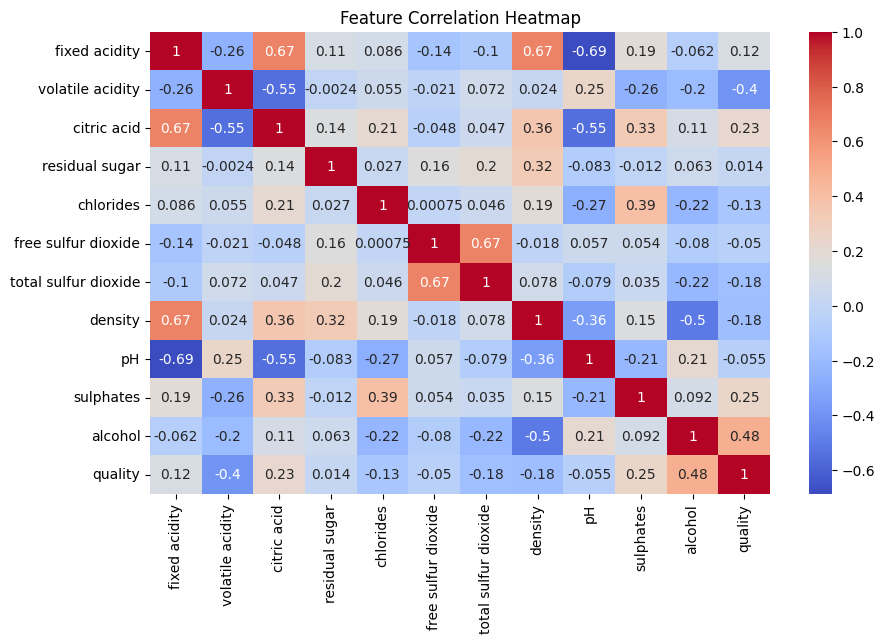

In [136]:
##Creating correlation of each feature
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## 4.5 Multivariate Analysis  

Multivariate analysis looks at the **combined effect of multiple features together**.  
This provides deeper insights than analyzing single variables, for example, how alcohol and acidity interact to affect wine quality.  


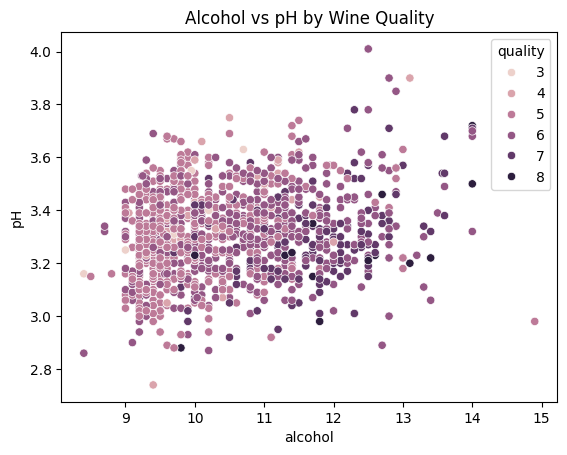

In [137]:
##Craeting a scatter plot of any two feature with Quality
sns.scatterplot(x='alcohol', y='pH', hue='quality', data=df)
plt.title('Alcohol vs pH by Wine Quality')
plt.show()

# 5. Feature Engineering for Red Wine Dataset

Feature Engineering is the process of **preparing and improving features** to make data more useful for machine learning models.  

In this step, we will perform the following steps:

1. **Outlier Treatment:** Remove or cap extreme values using IQR or Z-score.  
2. **Feature Scaling:** Scale numeric features using Min-Max Scaling or Standardization.  
3. **Feature Creation:** Create new informative features like `total_acidity` and ratios.  
4. **Feature Selection:** Select the most relevant features using correlation and remove redundancy.  
5. **Handle Class Imbalance (Optional):** Balance target classes if necessary.  
6. **Final Clean Dataset:** Ready for modeling.


## 5.1 Outlier Treatment
- Identify extreme values in numeric features
- Used IQR method to detect outliers
- Remove or cap outliers
- Ensures model stability and better predictions


In [138]:
##Cap Outlier
numeric_col=df.select_dtypes(include='number').columns

for col in numeric_col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1

    lower=Q1-1.5 * IQR
    higher=Q3+1.5 * IQR

    df[col]=df[col].clip(lower,higher)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [139]:

##Removing Outliers
numeric_col=df.select_dtypes(include='number').columns
for col in numeric_col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5 * IQR
    higher=Q3+1.5 * IQR
    df=df[(df[col]>=lower) & (df[col]<=higher)]

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


## 5.2 Feature Scaling
- Scale numeric features for comparability
- Methods:
  - Min-Max Scaling: scale features to [0,1]
  - Standardization: mean=0, std=1
- Improves model learning and convergence


In [140]:
##Min-Max Scaling: scale features to [0,1]

from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
df[numeric_col]=scalar.fit_transform(df[numeric_col])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.361290,0.648045,0.000000,0.363636,0.446429,0.243902,0.236287,0.622748,0.769737,0.343284,0.196078,0.375
1,0.412903,0.849162,0.000000,0.618182,0.708333,0.585366,0.514768,0.510135,0.361842,0.522388,0.274510,0.375
2,0.412903,0.715084,0.042553,0.509091,0.636905,0.341463,0.405063,0.532658,0.440789,0.477612,0.274510,0.375
3,0.851613,0.178771,0.595745,0.363636,0.434524,0.390244,0.455696,0.645270,0.309211,0.373134,0.274510,0.625
5,0.361290,0.603352,0.000000,0.327273,0.434524,0.292683,0.286920,0.622748,0.769737,0.343284,0.196078,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.283871,0.558659,0.085106,0.363636,0.351190,0.658537,0.270042,0.477477,0.651316,0.731343,0.215686,0.625
1594,0.206452,0.536313,0.085106,0.400000,0.613095,0.756098,0.320675,0.296171,0.690789,0.373134,0.411765,0.375
1595,0.167742,0.480447,0.106383,0.472727,0.279762,0.926829,0.379747,0.320946,0.782895,0.641791,0.549020,0.625
1597,0.167742,0.586592,0.127660,0.400000,0.434524,0.756098,0.320675,0.360360,0.848684,0.567164,0.352941,0.375


In [141]:
#Standardization: mean=0, std=1

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df[numeric_col]=scalar.fit_transform(df[numeric_col])

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.533308,0.971576,-1.394157,-0.698296,-0.288078,-0.478677,-0.391773,0.608506,1.341398,-0.654981,-0.961207,-0.779688
1,-0.292011,1.987398,-1.394157,0.454283,0.902462,0.942785,0.677343,0.051991,-0.726282,0.218684,-0.587463,-0.779688
2,-0.292011,1.310183,-1.189351,-0.039679,0.577769,-0.072545,0.256176,0.163294,-0.326086,0.000268,-0.587463,-0.779688
3,1.759013,-1.398676,1.473125,-0.698296,-0.342194,0.130521,0.450560,0.719809,-0.993080,-0.509370,-0.587463,0.476502
5,-0.533308,0.745837,-1.394157,-0.862950,-0.342194,-0.275611,-0.197388,0.608506,1.341398,-0.654981,-0.961207,-0.779688
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.895254,0.520099,-0.984545,-0.698296,-0.721002,1.247384,-0.262183,-0.109399,0.741104,1.237959,-0.867771,0.476502
1594,-1.257199,0.407230,-0.984545,-0.533642,0.469538,1.653516,-0.067799,-1.005388,0.941202,-0.509370,0.066588,-0.779688
1595,-1.438172,0.125057,-0.882142,-0.204333,-1.045695,2.364247,0.158983,-0.882955,1.408098,0.801127,0.720639,0.476502
1597,-1.438172,0.661186,-0.779739,-0.533642,-0.342194,1.653516,-0.067799,-0.688174,1.741595,0.437100,-0.213720,-0.779688


## 5.3 Feature Creation
- Combine existing features using arithmetic operations
- Examples:
  - total_acidity = fixed_acidity + volatile_acidity + citric_acid
  - sulphate_to_chloride_ratio = sulphates / chlorides
  - alcohol_density_interaction = alcohol * density



In [142]:
df['total_acidity']=df['fixed acidity']+df['volatile acidity']+df['citric acid']
df['suplhate_to_chloride_ratio']=df['sulphates']/df['chlorides']
df['alcohol_density_interaction']=df['alcohol']*df['density']

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity,suplhate_to_chloride_ratio,alcohol_density_interaction
0,-0.533308,0.971576,-1.394157,-0.698296,-0.288078,-0.478677,-0.391773,0.608506,1.341398,-0.654981,-0.961207,-0.779688,-0.955889,2.273620,-0.584900
1,-0.292011,1.987398,-1.394157,0.454283,0.902462,0.942785,0.677343,0.051991,-0.726282,0.218684,-0.587463,-0.779688,0.301230,0.242319,-0.030543
2,-0.292011,1.310183,-1.189351,-0.039679,0.577769,-0.072545,0.256176,0.163294,-0.326086,0.000268,-0.587463,-0.779688,-0.171179,0.000464,-0.095929
3,1.759013,-1.398676,1.473125,-0.698296,-0.342194,0.130521,0.450560,0.719809,-0.993080,-0.509370,-0.587463,0.476502,1.833462,1.488542,-0.422861
5,-0.533308,0.745837,-1.394157,-0.862950,-0.342194,-0.275611,-0.197388,0.608506,1.341398,-0.654981,-0.961207,-0.779688,-1.181627,1.914063,-0.584900


## 5.4 Feature Selection
- Keep features that correlate well with target
- Remove redundant or highly correlated features
- Methods:
  - Correlation analysis with target
  - Remove features with less correlation between themselves


In [143]:
##Finding Correlaation each feature with Target(Quality)
corr_target=df.corr()['quality'].sort_values(ascending=False)
corr_target


quality                        1.000000
alcohol                        0.484899
sulphates                      0.332457
citric acid                    0.229658
fixed acidity                  0.124298
residual sugar                 0.020125
total_acidity                 -0.024247
free sulfur dioxide           -0.054451
pH                            -0.056892
suplhate_to_chloride_ratio    -0.061062
density                       -0.183043
alcohol_density_interaction   -0.183820
chlorides                     -0.191047
total sulfur dioxide          -0.203733
volatile acidity              -0.393721
Name: quality, dtype: float64

In [144]:
##Setting Threhsold to drop fature that have correlation less than this.

threshold=0.1
low_corr_feature=corr_target[abs(corr_target)<threshold].index

df=df.drop(columns=low_corr_feature)

df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,alcohol_density_interaction
0,-0.533308,0.971576,-1.394157,-0.288078,-0.391773,0.608506,-0.654981,-0.961207,-0.779688,-0.584900
1,-0.292011,1.987398,-1.394157,0.902462,0.677343,0.051991,0.218684,-0.587463,-0.779688,-0.030543
2,-0.292011,1.310183,-1.189351,0.577769,0.256176,0.163294,0.000268,-0.587463,-0.779688,-0.095929
3,1.759013,-1.398676,1.473125,-0.342194,0.450560,0.719809,-0.509370,-0.587463,0.476502,-0.422861
5,-0.533308,0.745837,-1.394157,-0.342194,-0.197388,0.608506,-0.654981,-0.961207,-0.779688,-0.584900
...,...,...,...,...,...,...,...,...,...,...
1593,-0.895254,0.520099,-0.984545,-0.721002,-0.262183,-0.109399,1.237959,-0.867771,0.476502,0.094933
1594,-1.257199,0.407230,-0.984545,0.469538,-0.067799,-1.005388,-0.509370,0.066588,-0.779688,-0.066946
1595,-1.438172,0.125057,-0.882142,-1.045695,0.158983,-0.882955,0.801127,0.720639,0.476502,-0.636291
1597,-1.438172,0.661186,-0.779739,-0.342194,-0.067799,-0.688174,0.437100,-0.213720,-0.779688,0.147077


## 5.5 Handle Class Imbalance (Optional)
- Check target class distribution
- Methods to balance classes:
  - Combine classes (Low, Medium, High)
  - Oversample minority classes (SMOTE)
- Ensures fair learning and better predictions


In [152]:
# Combine classes (Low, Medium, High)
low=df['quality'].quantile(0.33)
high=df['quality'].quantile(0.66)
def categorize(q):
    if q<=low:
        return 'Low'
    elif q<=high:
        return 'Medium'
    else:
        return 'High'

df['Quality_Label']=df['quality'].apply(categorize)
print(df['Quality_Label'].value_counts())
df

Quality_Label
Low       640
Medium    535
High      184
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,alcohol_density_interaction,Quality_Label
0,-0.533308,0.971576,-1.394157,-0.288078,-0.391773,0.608506,-0.654981,-0.961207,-0.779688,-0.584900,Low
1,-0.292011,1.987398,-1.394157,0.902462,0.677343,0.051991,0.218684,-0.587463,-0.779688,-0.030543,Low
2,-0.292011,1.310183,-1.189351,0.577769,0.256176,0.163294,0.000268,-0.587463,-0.779688,-0.095929,Low
3,1.759013,-1.398676,1.473125,-0.342194,0.450560,0.719809,-0.509370,-0.587463,0.476502,-0.422861,Medium
5,-0.533308,0.745837,-1.394157,-0.342194,-0.197388,0.608506,-0.654981,-0.961207,-0.779688,-0.584900,Low
...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.895254,0.520099,-0.984545,-0.721002,-0.262183,-0.109399,1.237959,-0.867771,0.476502,0.094933,Medium
1594,-1.257199,0.407230,-0.984545,0.469538,-0.067799,-1.005388,-0.509370,0.066588,-0.779688,-0.066946,Low
1595,-1.438172,0.125057,-0.882142,-1.045695,0.158983,-0.882955,0.801127,0.720639,0.476502,-0.636291,Medium
1597,-1.438172,0.661186,-0.779739,-0.342194,-0.067799,-0.688174,0.437100,-0.213720,-0.779688,0.147077,Low


In [ ]:
#Oversample minority classes (SMOTE) to Balance
from imblearn.over_sampling import SMOTE
X=df.drop(['quality','Quality_Label'],axis=1)
y=df['Quality_Label']

oversampling=SMOTE()
X_smote,y_smote=oversampling.fit_resample(X,y)

print("Class Distribution after SMOTE: ")
print(pd.Series(y_smote).value_counts())

Class Distribution after SMOTE: 
Quality_Label
Low       640
Medium    640
High      640
Name: count, dtype: int64


## 5.6 Final Clean Dataset
- Dataset is cleaned, scaled, and engineered
- All features are numeric and ready for modeling
- Next step: Train machine learning models


In [159]:
X=df.drop(['quality','Quality_Label'],axis=1)
y=df['Quality_Label']
print(X.shape,y.shape)

(1359, 9) (1359,)


# Ensuring Data set is Cleaned by 
- Class Distrubution(After Balancing)
- Feature Dustribution(Histogram)
- Correlation HeatMap

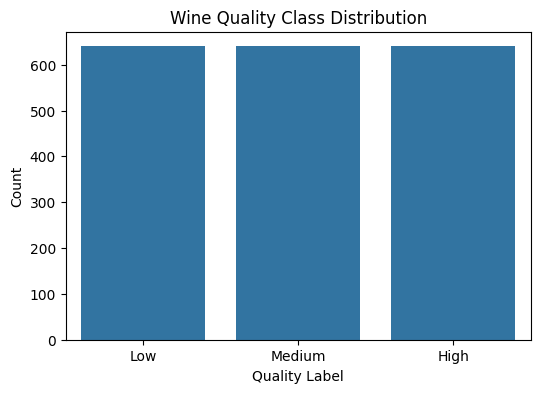

In [ ]:
#Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_smote) 
plt.title('Wine Quality Class Distribution')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.show()

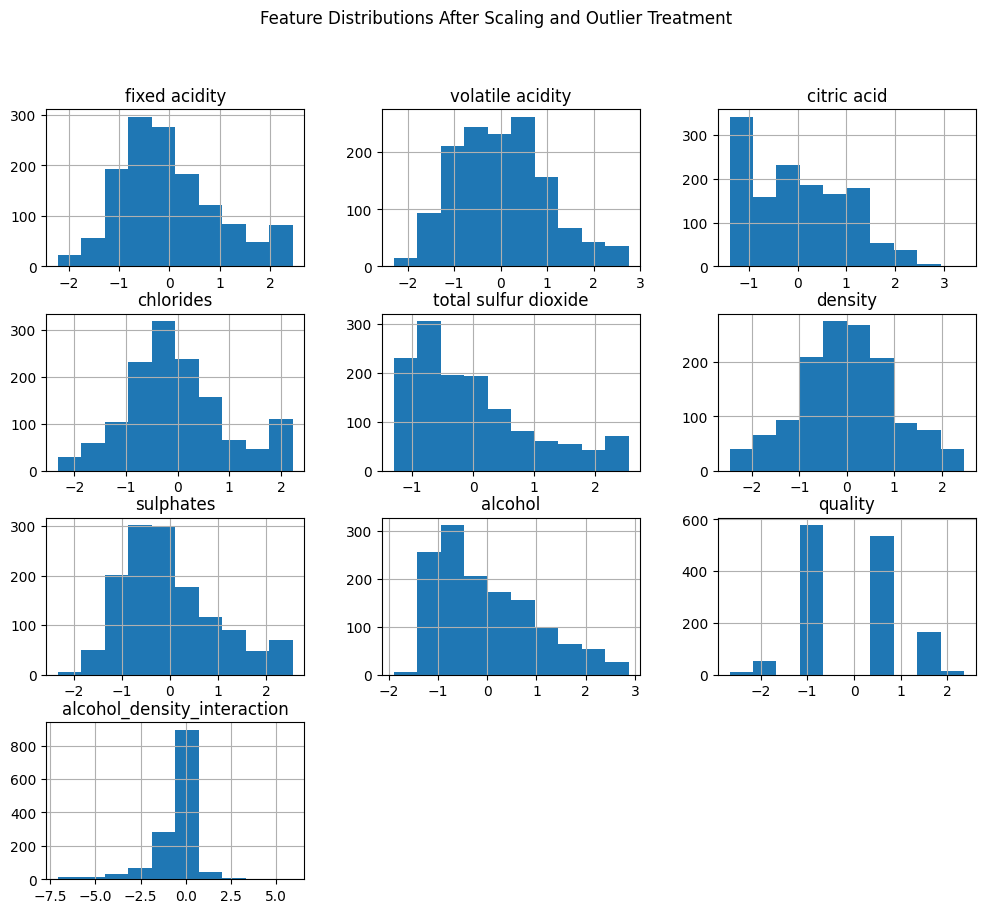

In [162]:
##Feature Distribution(Histogram)
df.hist(figsize=(12,10), bins=10)
plt.suptitle('Feature Distributions After Scaling and Outlier Treatment')
plt.show()


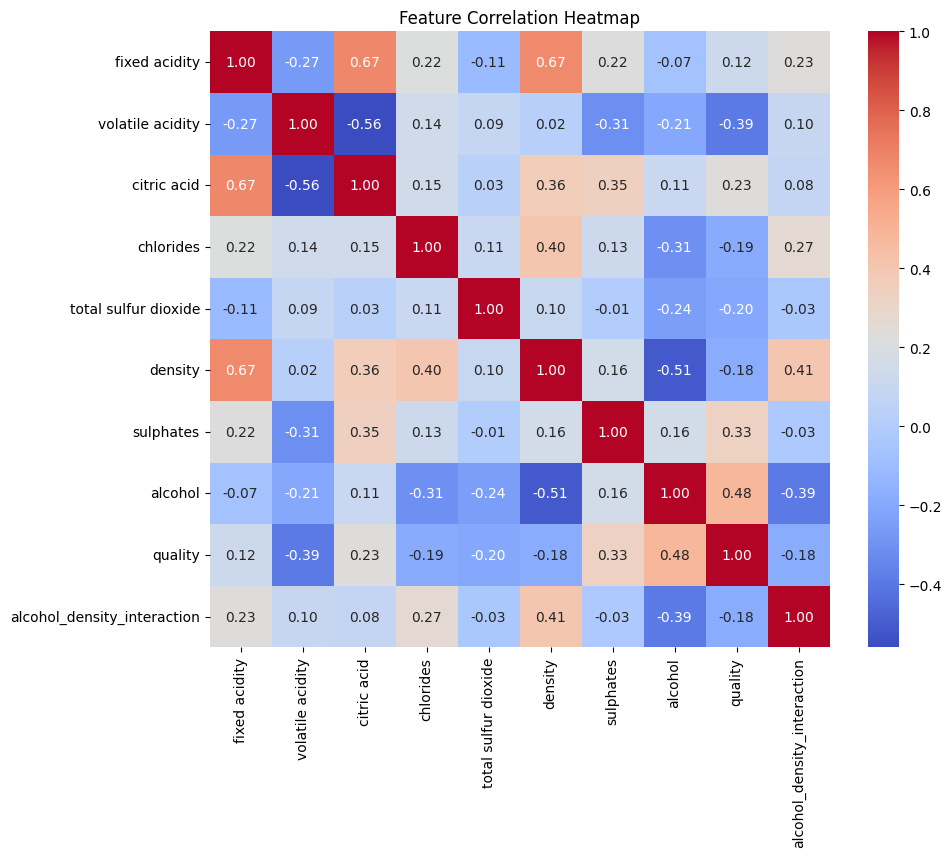

In [167]:
numeric_col=df.select_dtypes(include=['float64','int64'])
corr_matrix=numeric_col.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
